<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/ds_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы



In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [35]:
# Импортируем данные из файла ds_salaries.csv
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [36]:
# Выведем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


3755 объектов, 11 признаков. Описание признаков:

work_year [categorical] : Это конкретный год, в котором была выплачена заработная плата. В разные годы могут быть разные экономические условия, которые могут повлиять на уровень заработной платы.

experience_level [categorical] : уровень опыта, который человек имеет на конкретной работе. Это является ключевым фактором при расчете заработной платы, поскольку, как правило, более опытные сотрудники получают более высокую зарплату благодаря своим передовым навыкам и знаниям.

employment_type [categorical] : Характер трудового договора, например, полный рабочий день, неполный рабочий день или по контракту, может существенно влиять на заработную плату. Сотрудники, работающие полный рабочий день, часто получают более высокую годовую заработную плату по сравнению со своими коллегами, работающими неполный рабочий день или по контракту.

job_title [categorical] : Должность, которую человек занимает в компании. Разные должности имеют разную шкалу заработной платы в зависимости от требуемых обязанностей и навыков. Например, на руководящих должностях обычно платят больше, чем на должностях начального уровня.

salary [numerical] : общая сумма заработной платы, выплачиваемой сотруднику. На это напрямую влияют такие факторы, как уровень опыта, название должности и тип занятости.

salary_currency [categorical] : Конкретная валюта, в которой выплачивается заработная плата, обозначаемая кодом ISO 4217. Обменные курсы могут влиять на величину заработной платы при пересчете в разные валюты.

salaryinusd [numerical] : общая сумма заработной платы брутто, пересчитанная в доллары США. Это позволяет проводить единообразное сравнение заработной платы в разных странах и валютах.

employee_residence [categorical]: Основная страна проживания сотрудника, обозначаемая кодом ISO 3166. Стоимость жизни и преобладающие ставки заработной платы в стране проживания сотрудника могут влиять на уровень заработной платы.

remote_ratio [ratio]: доля работы, выполняемой удаленно. С ростом удаленной работы компании могут корректировать заработную плату в зависимости от стоимости жизни в месте нахождения сотрудника и доли удаленной работы.

company_location [categorical]: местоположение главного офиса работодателя или филиала, с которым заключен контракт. Компании в разных регионах могут предлагать разные уровни заработной платы из-за различных экономических условий и стоимости жизни.

company_size [categorical]: Среднее число сотрудников в компании в течение рабочего года. Крупные компании часто имеют структурированную шкалу заработной платы и могут предлагать более высокие оклады за счет эффекта масштаба и увеличения доходов.

In [37]:
# Посмотрим на пропущенные значения
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [38]:
# Проверим наличие дубликатов
df.duplicated().sum()

1171

1171 дубликат из 3755 строк - это довольно много.

Поскольку проверялись все столбцы, это означает, что 1171 строка полностью повторяет другие строки в датасете.

Очевидно, что специалисты одних позиций, имеющие одинаковый опыт (грейд) получают ориентировочно одинаковые ЗП. Пробуем не удалять дубликаты.

In [39]:
# Исследуем описательную статистику
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


1. Год работы (work_year):

Среднее значение: 2022.37 - большинство данных относятся к 2022 году.
Стандартное отклонение: 0.69, низкое значение говорит о том, что данные сконцентрированы вокруг среднего значения.
Минимум: 2020.
Максимум: 2023.
2. Зарплата (salary):

Среднее значение: 190695.6.
Стандартное отклонение: 671676.5. Высокое значение говорит о значительном разбросе зарплат.
Минимум: 6000.
Максимум: 30400000. Есть один или несколько выбросов, которые значительно повышают среднее значение.
25% зарплат меньше 100000,
50% меньше 138000,
75% меньше 180000.
3. Зарплата в долларах (salary_in_usd):

Среднее значение: 137570.4 - зарплата в долларах США.
Стандартное отклонение: 63055.6. Высокое значение, вероятно, обусловлено выбросами.
Минимум: 5132.
Максимум: 450000.
4. Процент удаленной работы (remote_ratio):

Среднее значение: 46.27.
В среднем, сотрудники работают удаленно чуть меньше половины времени.
Стандартное отклонение: 48.59. Это говорит о том, что разброс в проценте удаленной работы довольно большой.
Минимум: 0. Полностью не удаленная работа.
Максимум: 100. Полностью удаленная работа.

In [40]:
df.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


1. experience_level: Уровень опыта имеет 4 уникальных значения, и большинство (2516 из 3755) записей относятся к категории "SE", что может означать "Senior Expert"

2. employment_type: Вид занятости также имеет 4 уникальных значения, наиболее частым из которых является "FT" (3718 из 3755), что обозначает "Full-Time" или полную занятость.

3. job_title: Наименование должности содержит 93 уникальных значения, и наиболее часто встречающаяся должность - это "Data Engineer" (1040 записей).

4. employee_residence: Страна проживания сотрудника представлена 78 уникальными значениями, преимущественное большинство сотрудников проживают в США (3004 записи).

6. company_location: Местонахождение компании также чаще всего в США (3040 из 3755 записей).

7. company_size: Размер компании имеет всего 3 уникальных значения и наиболее часто встречаемый размер - "M" (3153 записи), что обозначает "Medium" или средний размер компании.


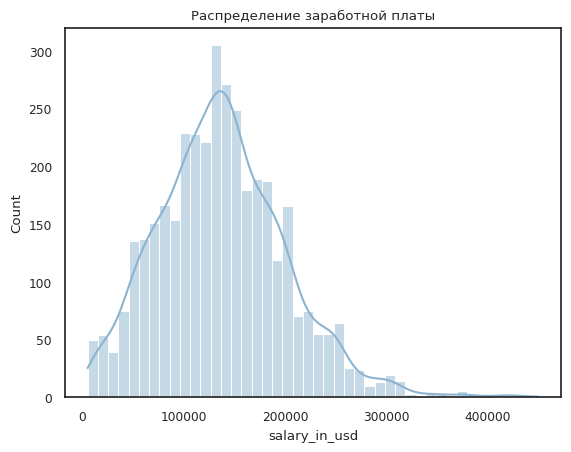

In [42]:
# Гистограмма распределения ЗП
sns.histplot(x='salary_in_usd', data=df, kde=True)
plt.title('Распределение заработной платы')
plt.show()

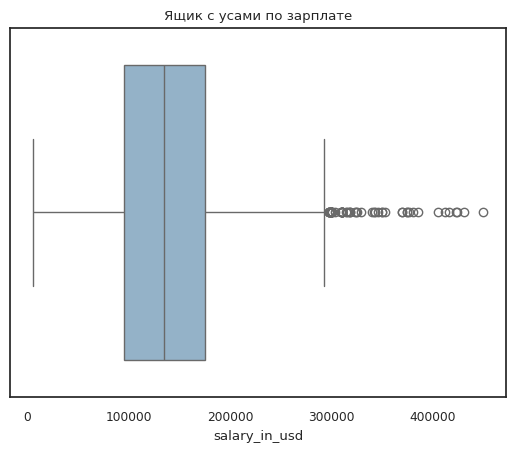

In [43]:
# Ящик с усами по зарплате
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Ящик с усами по зарплате')
plt.show()

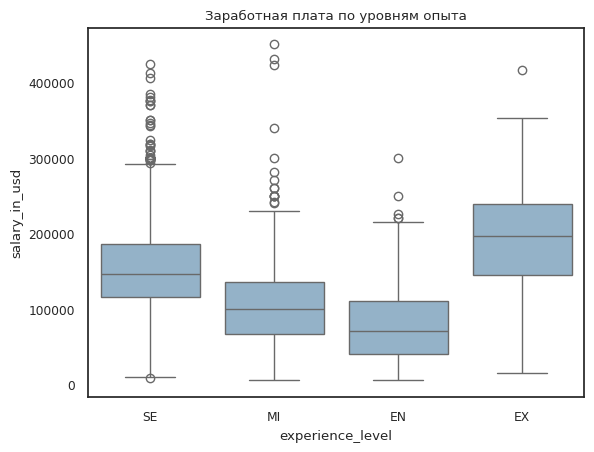

In [44]:
# Ящик с усами
df.dropna(subset=['experience_level'], inplace=True)

sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Заработная плата по уровням опыта')
plt.show()

In [45]:
# Удалим значения, которые больше 300000 (посчитаем их выбросами)
df = df[df['salary_in_usd'] <= 300000]

# Проверка результатов
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3713 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3713 non-null   int64 
 1   experience_level    3713 non-null   object
 2   employment_type     3713 non-null   object
 3   job_title           3713 non-null   object
 4   salary              3713 non-null   int64 
 5   salary_currency     3713 non-null   object
 6   salary_in_usd       3713 non-null   int64 
 7   employee_residence  3713 non-null   object
 8   remote_ratio        3713 non-null   int64 
 9   company_location    3713 non-null   object
 10  company_size        3713 non-null   object
dtypes: int64(4), object(7)
memory usage: 348.1+ KB
None


In [46]:
# Рассмотрим признак job_title
df.job_title.value_counts()

,count
job_title,
Data Engineer,1031
Data Scientist,834
Data Analyst,610
Machine Learning Engineer,284
Analytics Engineer,103
...,...
Principal Machine Learning Engineer,1
Azure Data Engineer,1
Marketing Data Engineer,1


In [47]:
# Сгруппируем специальности
def assign_broader_category(job_title):
    category_mapping = {
        "Data Engineering": ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"],
        "Data Science": ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"],
        "Machine Learning": ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"],
        "Data Architecture": ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"],
        "Management": ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    }

    for category, job_titles in category_mapping.items():
        if job_title in job_titles:
            return category

    return "Other"

In [48]:
df['job_category'] = df['job_title'].apply(assign_broader_category)
df['job_category'].value_counts()

,count
job_category,
Data Engineering,1802
Data Science,973
Other,412
Machine Learning,322
Data Architecture,103
Management,101


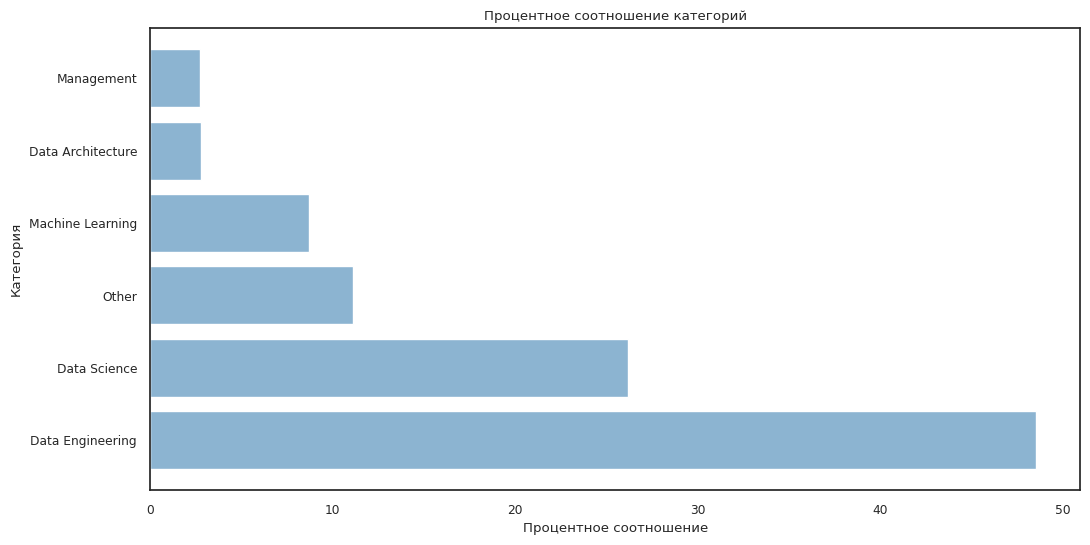

In [49]:
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Процентное соотношение')
ax.set_ylabel('Категория')
ax.set_title('Процентное соотношение категорий')
plt.show()

Категория "Data Engineering" имеет самую большую долю, около 50%.

"Data Science" следует за ней, около 25%.

Категория "Other" представлена примерно 15%.

"Machine Learning" составляет чуть меньше 10%.

"Data Architecture" и "Management" занимают наименьший процент, обе категории находятся ниже 5%.

In [50]:
# Для исследования корреляции преобразуем категориальные данные к числовым типам
df['employment_type'].value_counts()

,count
employment_type,
FT,3677
PT,17
FL,10
CT,9


- FT (Полный рабочий день):
- CT (Контракт):
- FL (Фриланс):
- PT (Частичная занятость):

In [51]:
df['employment_type'].replace({"FT": 4, "CT": 3, "FL": 2, "PT": 1}, inplace=True)

In [52]:
df['experience_level'].value_counts()

,count
experience_level,
SE,2490
MI,801
EN,320
EX,102


- EN (Entry Level)
- MI (Middle level)
- SE (Senior level)
- EX (Executive Level)

In [53]:
df['experience_level'].replace({"EX": 4, "SE": 3, "MI": 2, "EN": 1}, inplace=True)

In [54]:
df['company_size'].value_counts()

,count
company_size,
M,3123
L,443
S,147


In [55]:
df['company_size'].replace({"S": 1, "M": 2, "L": 3}, inplace=True)

In [56]:
df[df['company_location'] != df['employee_residence']].shape[0]/df.shape[0]*100

2.5855103689738757

По выведенным данным: "company_location" не совпадает с "employee_residence" только в 2,5 % случаев, поэтому удаляем признак "employee_residence"

In [57]:
df.drop(columns=['employee_residence'], inplace=True)

In [58]:
# Закодируем 'company_location' на основе количества встречаемости
df['company_location'] = df['company_location'].map(df['company_location'].value_counts())

In [59]:
# Так же имеем 3 признака заработных плат, оставим только salary_in_usd, другие удалим
df.drop(columns=["salary","salary_currency"], inplace=True)

In [60]:
# "work_year" заменим на "years_of_experience"

from datetime import datetime

# Получаем текущий год
current_year = datetime.now().year
df['years_of_experience'] = current_year - df['work_year']
df.drop(columns=["work_year"], inplace=True)

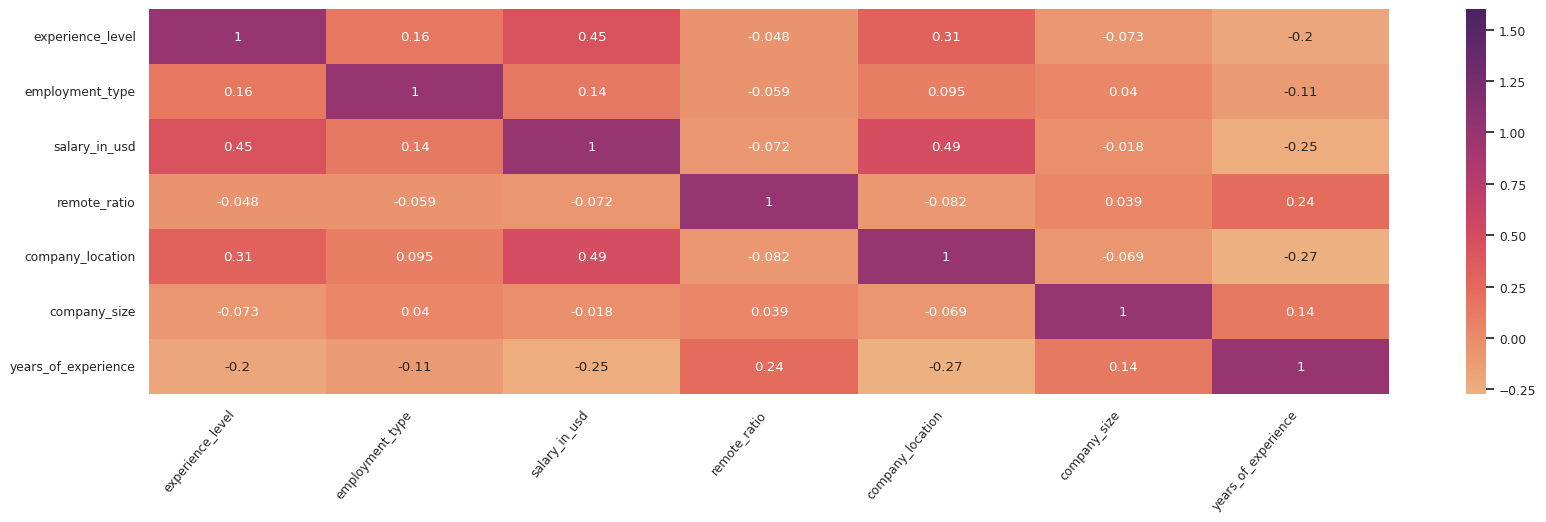

In [61]:
# Корреляция между признаками
plt.figure(figsize = (20,5))
X = df.select_dtypes(include='number')
sns.heatmap(X.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

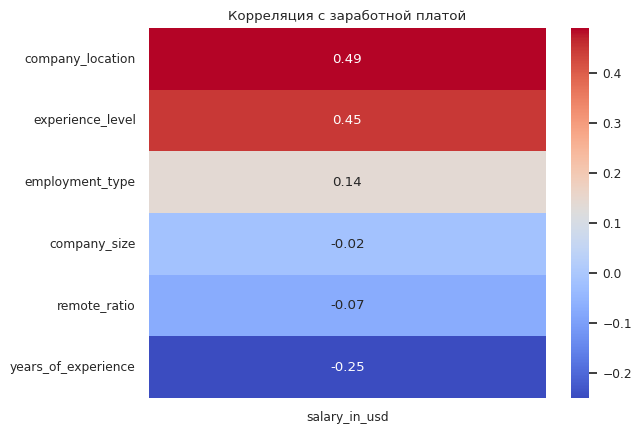

In [62]:
corr = X.corr()
target_corr = corr['salary_in_usd'].drop('salary_in_usd')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с заработной платой')
plt.show()


company_location (0.49):

наибольшая положительная корреляция - местоположение компании сильно влияет на уровень заработной платы, чем лучше расположение, тем выше зарплата.

experience_level (0.45):
второй наиболее коррелирующий признак - уровень опыта значительно влияет на зарплату, более высокий уровень опыта связан с более высокой зарплатой.

employment_type (0.14):
слабая положительная корреляция, тип занятости имеет незначительное влияние на зарплату.

company_size (-0.02):
практически нулевая корреляция - размер компании почти не влияет на уровень заработной платы.

remote_ratio (-0.07):
негативная корреляция, удаленная работа имеет небольшое отрицательное влияние на зарплату.

years_of_experience (-0.25):
отрицательная корреляция,
Удивительно, но большее количество лет опыта связано с более низкой зарплатой.

In [64]:
# Создадим признак, который будет отражать соотношение зарплаты и уровня опыта.
# Это может помочь понять, как уровень опыта влияет на зарплату.

# Создадим новый признак 'salary_experience_ratio'
df['salary_experience_ratio'] = df['salary_in_usd'] / (df['experience_level'] + 1)

# Проверим первые несколько строк DataFrame, чтобы убедиться, что новый признак добавлен
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,job_category,years_of_experience,salary_experience_ratio
0,3,4,Principal Data Scientist,85847,100,77,3,Other,1,21461.75
1,2,3,ML Engineer,30000,100,3000,1,Machine Learning,1,10000.00
2,2,3,ML Engineer,25500,100,3000,1,Machine Learning,1,8500.00
3,3,4,Data Scientist,175000,100,87,2,Data Science,1,43750.00
4,3,4,Data Scientist,120000,100,87,2,Data Science,1,30000.00


In [66]:
# Построение модели линейной регрессии

#Нормализация данных:

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_df = df.select_dtypes(include='number')

salaries_scaled  = pd.DataFrame(min_max_scaler.fit_transform(numerical_df), columns=numerical_df.columns)

In [67]:
# Отделяем целевую перменную salary_in_usd
X = salaries_scaled.drop(columns=["salary_in_usd"])
y = salaries_scaled["salary_in_usd"]

In [68]:
#Разделяем на обучающую и теcтовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Оценим качество модели
lin_reg_pred = lin_reg_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg_mae = mean_absolute_error(lin_reg_pred, y_test)
lin_reg_mse = mean_squared_error(lin_reg_pred, y_test)
lin_reg_r2  = r2_score(y_test, lin_reg_pred)

print(f"Linear Regression metrics:\nMAE: {lin_reg_mae}, MSE: {lin_reg_mse}, R2-score: {lin_reg_r2}")

Linear Regression metrics:
MAE: 0.02969660068058142, MSE: 0.0019917244364909136, R2-score: 0.9483993087280794


MAE (Mean Absolute Error): 0.0297 - средняя абсолютная ошибка указывает на небольшие отклонения предсказаний модели от фактических значений.

MSE (Mean Squared Error): 0.00199 - среднеквадратичная ошибка также указывает на небольшие ошибки предсказаний. MSE более чувствителен к большим ошибкам, чем MAE.

R2-score: 0.9484-коэффициент детерминации R^2 означает, что модель объясняет 94.84% вариации данных. Это указывает на высокую точность модели.

Модель линейной регрессии показывает отличные результаты с низкими значениями MAE и MSE, а также высоким значением R^2. Модель хорошо справляется с задачей предсказания.

In [73]:
lin_reg_model.coef_

array([ 3.89092824e-01, -5.22121108e-02,  6.73875183e-03, -1.03712259e-02,
       -1.75073149e-03,  8.16903289e-04,  1.65992017e+00])

Коэффициенты показывают, насколько сильно каждый признак влияет на предсказанную зарплату. Положительные значения указывают на положительное влияние, а отрицательные — на отрицательное. Признак с коэффициентом 1.65992017e+00 имеет наибольшее влияние на зарплату.

In [74]:
# Построение модели дерева решений

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeRegressor()

In [75]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10, 20, 50, 100, 200, 500],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50, 100, 200]
}

In [76]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры (Grid Search): {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая оценка (Grid Search): 1.00


In [77]:
#Модель с лучшими параметрами:
dt_model_opt  = DecisionTreeRegressor(max_depth=11, min_samples_leaf=1, min_samples_split=2)
dt_model_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11)

In [78]:
#Метрики качеcтва:
dt_pred = dt_model_opt.predict(X_test)
RMSE_dt = np.sqrt(mean_squared_error(dt_pred, y_test))
R2_dt = r2_score(y_test, dt_pred)
print(f"Decision Tree Regression metrics:\nRMSE: {RMSE_dt}, R2-score: {R2_dt}")

Decision Tree Regression metrics:
RMSE: 0.0044941583614137495, R2-score: 0.9994767334041199


Модель Decision Tree Regression показывает отличные результаты с очень низким значением RMSE и высоким значением R^2. Это указывает на то, что модель очень хорошо справляется с задачей предсказания.

В сравнении с линейной регрессией, дерево решений меньше ошибается, указывает на более точные предсказания.
R2-score у Decision Tree Regression (0.9995) также выше, чем у линейной регрессии (0.9484), что указывает на лучшую объяснительную способность модели.

In [105]:
# Построение ансамблевой модели

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [106]:
# Гиперпарметры моделей так же подберем при помощи GridSearch

rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [107]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50]
}

In [109]:
# Оптимальные параметры для модели RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для модели RandomForest: {grid_search_rf.best_params_}")
print(f"Лучшая оценка для модели RandomForest: {grid_search_rf.best_score_:.2f}")

Лучшие гиперпараметры для модели RandomForest: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Лучшая оценка для модели RandomForest: 1.00


In [110]:
# Оптимальные параметры для модели GradientBoosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для модели GradientBoosting: {grid_search_gb.best_params_}")
print(f"Лучшая оценка для модели GradientBoosting: {grid_search_gb.best_score_:.2f}")

Лучшие гиперпараметры для модели GradientBoosting: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 150}
Лучшая оценка для модели GradientBoosting: 1.00


In [111]:
rf_opt_model = RandomForestRegressor(n_estimators=50, max_depth=11, min_samples_leaf=1, min_samples_split=2)
gb_opt_model = GradientBoostingRegressor(n_estimators=150, max_depth=5, min_samples_leaf=1, min_samples_split=20)

In [112]:
rf_opt_model.fit(X_train, y_train)
gb_opt_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=20, n_estimators=150)

In [114]:
r2_rf = r2_score(y_test, rf_opt_model.predict(X_test))
r2_gb = r2_score(y_test, gb_opt_model.predict(X_test))

print(f"Random Forest:\nr2: {r2_rf}\nGradient Boosting:\nr2: {r2_gb}")

Random Forest:
r2: 0.9993000699700101
Gradient Boosting:
r2: 0.9993364618377351


Обе модели показывают практически идентичные результаты с очень высоким значением R² - 0,999, что указывает на их высокую эффективность в предсказании целевой переменной. Разница между ними минимальна, и обе модели могут считаться отличными для данной задачи.

In [90]:
# Кластеризация

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

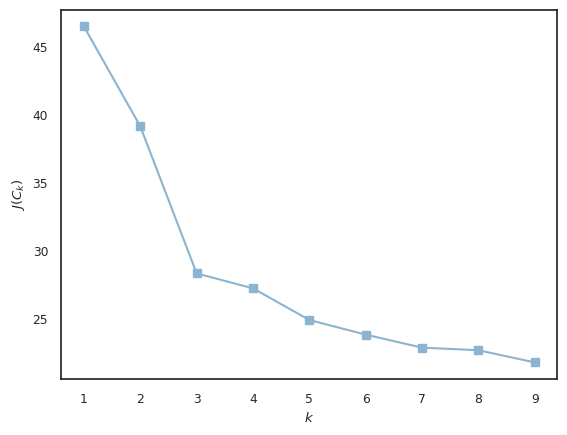

In [91]:
# Определим оптимальное количество кластеров методом "локтя"
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(salaries_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

Можно сделать вывод, что оптимальным количеством кластеров является 3

Разобьем данные на 3 кластера методом kMeans и визуализируем данные и цнетроиды на плоскости методом PCA

In [96]:
# PCA и KMeans
pca = PCA(n_components=3)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(salaries_scaled)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

# Создание DataFrame для PCA
principal_df = pd.DataFrame(data=pca.fit_transform(salaries_scaled))

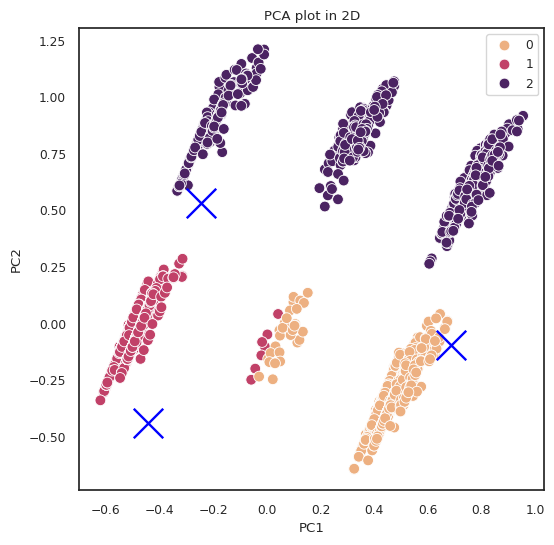

In [97]:
# Визуализация
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_k,
                palette="flare",
                s=60)
sns.scatterplot(x = centroids_pca[:,0],
                y =  centroids_pca[:,1],
                marker="x",
                s=450,
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [98]:
# Оценим качество кластеризации при помощи метрики silhouette

from sklearn.metrics import silhouette_score

silhouette = silhouette_score(salaries_scaled, pred_k)
print('\nK-Means')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))


K-Means
_____________________________________________

Силуэт 0.515


Силуэтный коэффициент варьируется от -1 до 1.

Силуэтный коэффициент 0.515 - указывает на умеренно хорошее качество кластеризации. Кластеры достаточно хорошо разделены, но есть некоторое перекрытие между ними


In [100]:
# Построим распределения по каждому кластеру

df_cluster = salaries_scaled.copy()
df_cluster['K-Means'] = pred_k

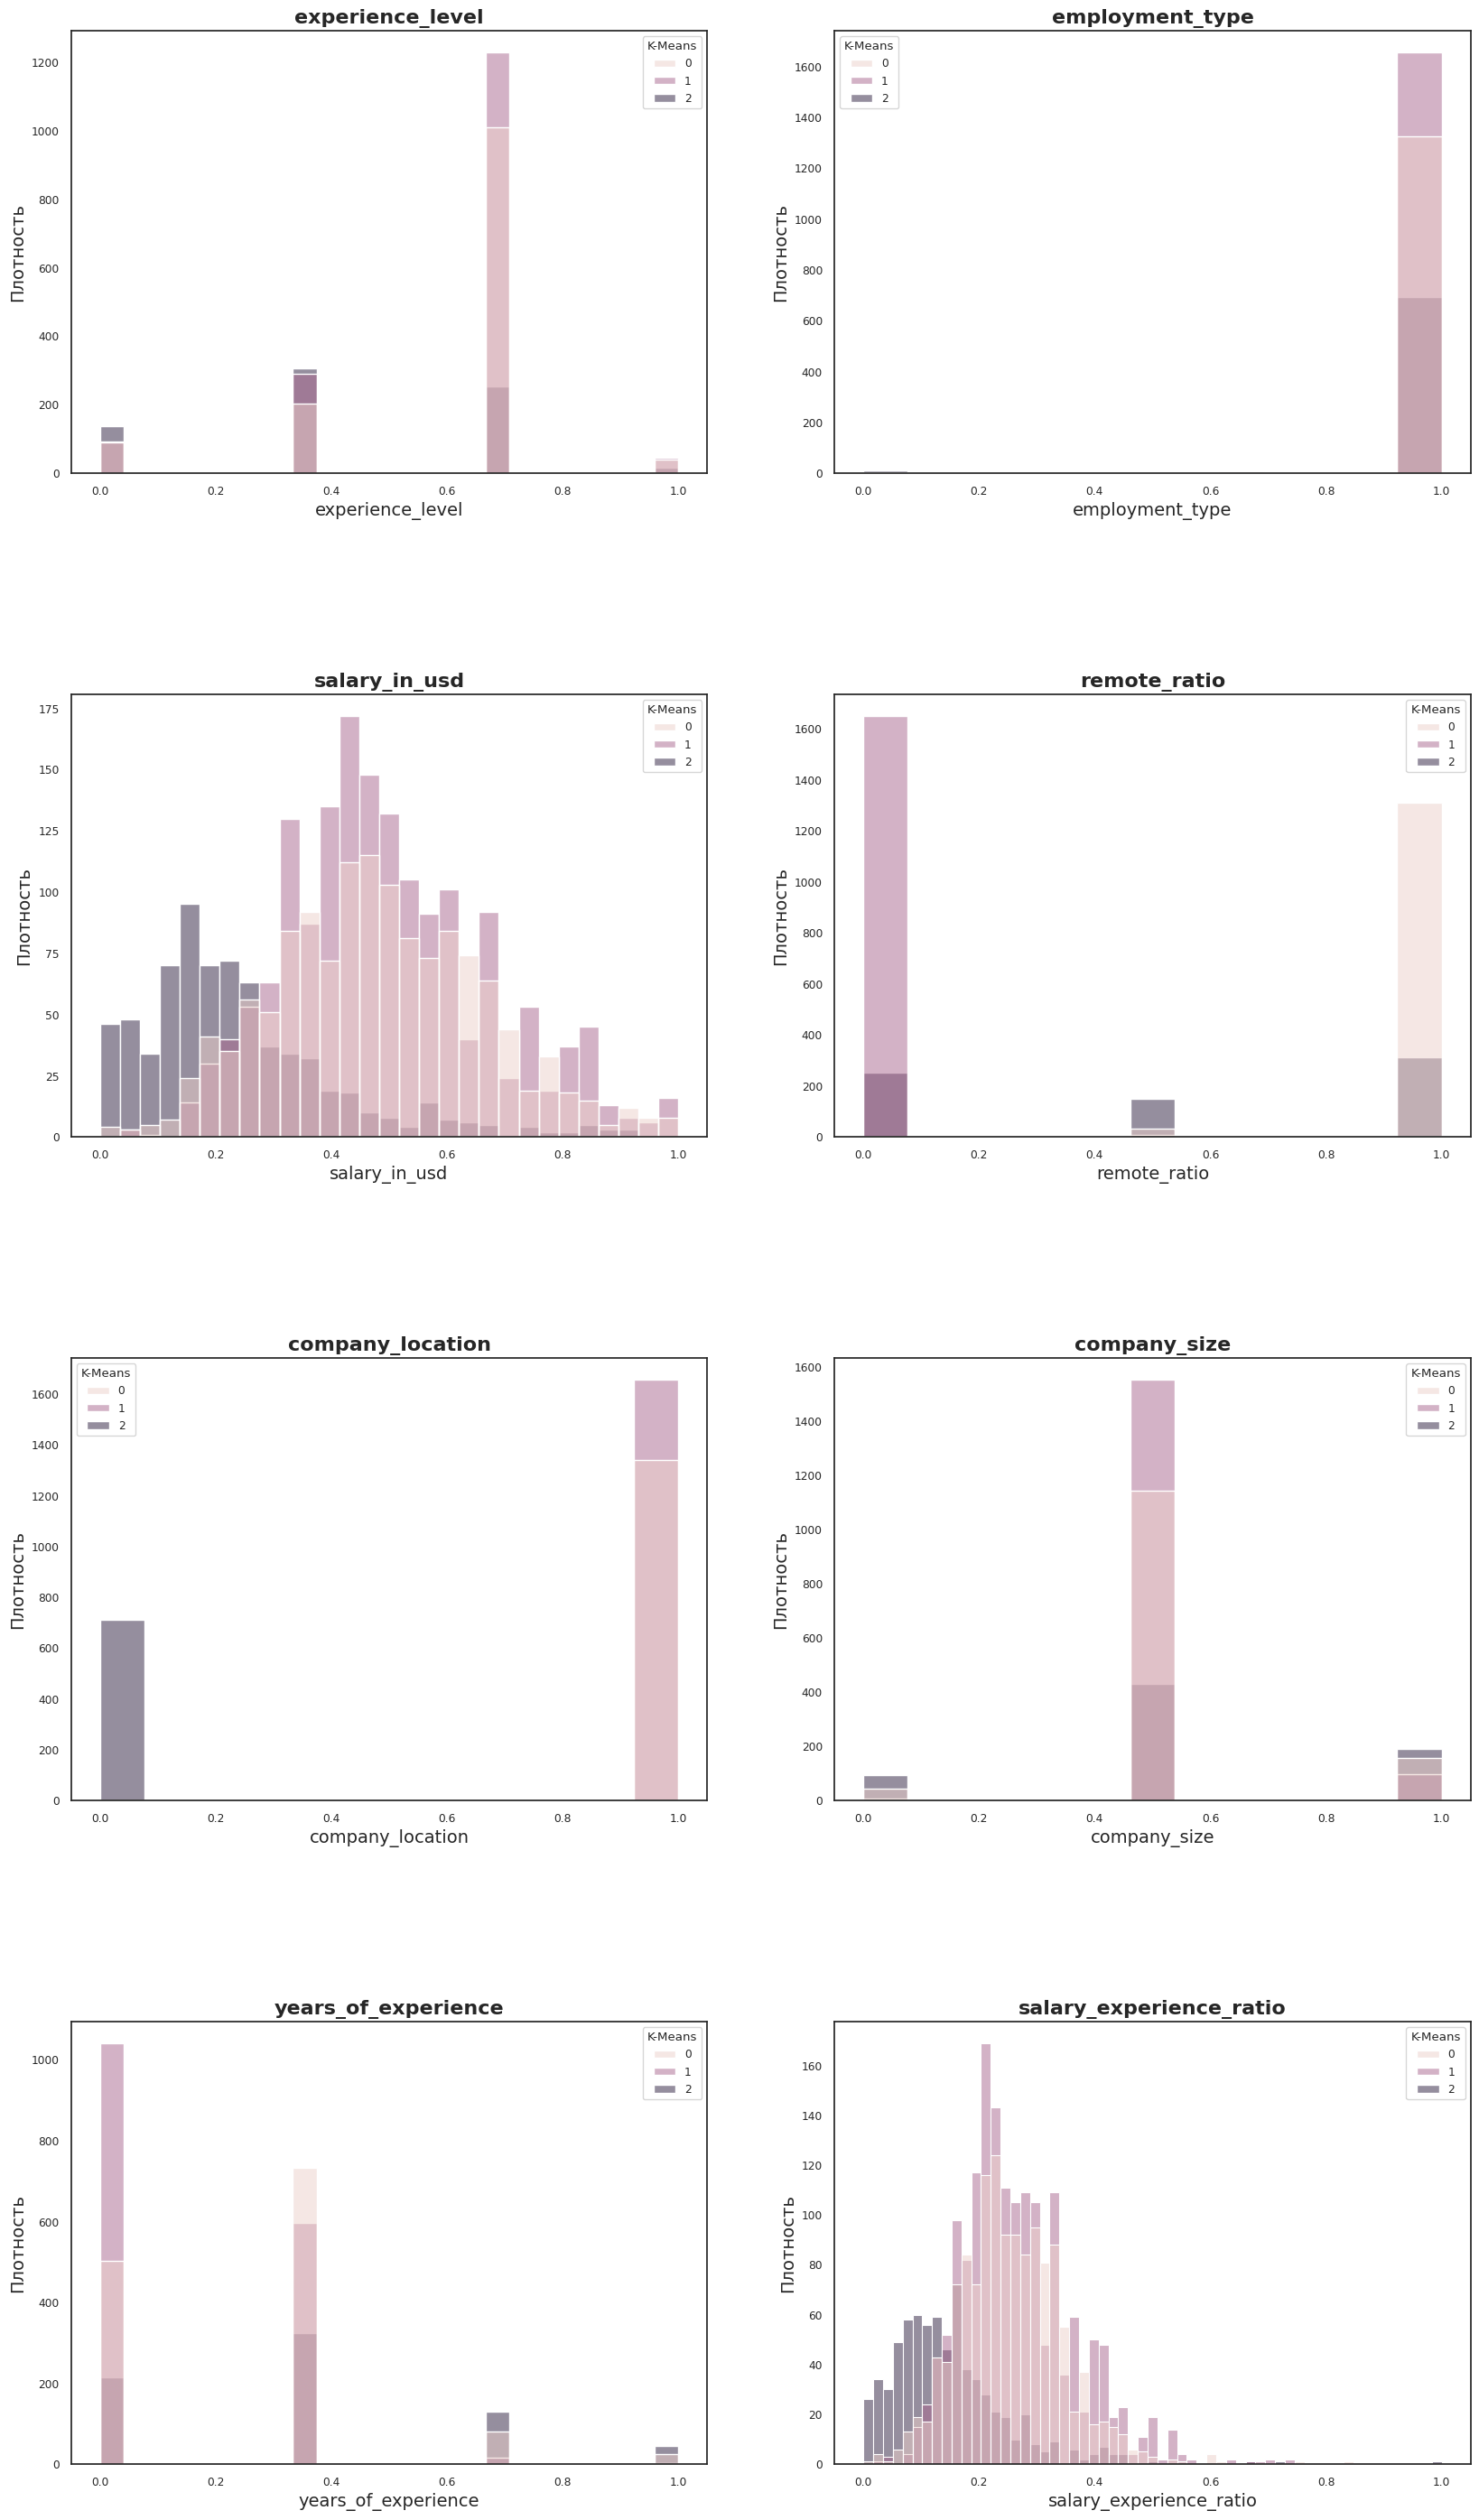

In [104]:
fig, axes = plt.subplots(len(columns) // 2 + len(columns) % 2, 2, figsize=(20, 35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Строим распределения (histplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_cluster,
                 x=column,
                 hue='K-Means',
                 ax=ax)

    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)

plt.show()

Уровень опыта (experience_level):
В кластере “0” большинство сотрудников имеют высокий уровень опыта, что отражается в значениях, близких к 1.

Тип занятости (employment_type):
В этом кластере преобладают определенные типы занятости, которые имеют значения, близкие к 1. Это может указывать на высокую долю постоянных сотрудников или сотрудников на полный рабочий день.

Зарплата в долларах США (salary_in_usd):
Зарплаты в этом кластере также высоки, что отражается в значениях, близких к 1. Это может указывать на высокооплачиваемые должности.

Соотношение удаленной работы (remote_ratio):
В кластере “0” соотношение удаленной работы также высоко, что может указывать на большую долю сотрудников, работающих удаленно.

Кластер “0” характеризуется высокими значениями по всем признакам, что может указывать на группу сотрудников с высоким уровнем опыта, высокими зарплатами и значительной долей удаленной работы.